In [1]:
import numpy as np
import h5py
import time
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
mask = np.load('/project2/chihway/raulteixeira/data/metacal_gold_mask.npy')

In [ ]:
with h5py.File('/project2/chihway/data/decade/metacal_gold_combined_20230613.hdf') as f:
    print(f.keys())
    flux_r, flux_i, flux_z = np.array(f['mcal_flux_noshear']).T
    flux_err_r, flux_err_i, flux_err_z = np.array(f['mcal_flux_err_noshear']).T
    

In [3]:
fnames = glob.glob(f'/project/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_*_mcal_gold.h5')

In [4]:
dfs = []
for fname in fnames:
    df_i = pd.DataFrame()
    with h5py.File(fname) as f:
        for key in list(f.keys()):
            df_i[key] = np.array(f[key])
    dfs.append(df_i)

In [5]:
df_ = pd.concat(dfs)

df_['COADD_OBJECT_ID']=df_['ID']

In [6]:
df_

,CHI_SQ,ID,M_0,ODDS,T_B,T_ML,Z_B,Z_B_MAX,Z_B_MIN,Z_MEAN,Z_ML,Z_SAMP,Z_SIG,COADD_OBJECT_ID
0,1.667989,7064258587,21.599970,0.930423,1.0,1.0,0.775,0.863257,0.686743,0.773316,0.775,0.755,0.048467,7064258587
1,0.588839,7064258590,18.017878,0.661093,1.0,1.0,0.175,0.345000,0.116576,0.229732,0.175,0.365,0.080958,7064258590
2,0.551889,7064258591,20.914652,0.433793,3.0,2.0,0.625,0.705799,0.245000,0.467109,3.095,0.695,0.165767,7064258591
3,0.057081,7064258595,22.330587,0.507447,4.0,6.0,0.425,0.535000,0.285000,0.420470,3.455,0.105,0.114308,7064258595
4,5.264744,7064258597,19.566309,1.000000,2.0,2.0,0.755,0.842263,0.667737,0.755046,0.755,0.775,0.027567,7064258597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118349,4.659883,7027204610,20.336363,0.967224,1.0,1.0,0.255,0.317402,0.192598,0.257601,0.245,0.325,0.040981,7027204610
118350,0.296148,7027204622,22.177099,0.480646,4.0,6.0,0.265,0.475000,0.202101,0.338051,3.245,0.225,0.130165,7027204622
118351,0.246857,7027204637,22.024208,0.802881,4.0,4.0,0.615,0.695302,0.505000,0.571907,0.635,0.675,0.127080,7027204637
118352,1.283425,7027204649,23.375711,0.422521,2.0,2.0,0.815,1.205000,0.715000,0.931908,1.375,0.845,0.231955,7027204649


In [7]:
cols = ['COADD_OBJECT_ID', 'cells'] + [f'FLUX_{band}' for band in ['R', 'I', 'Z']] + [f'FLUX_ERR_{band}' for band in ['R', 'I', 'Z']]

In [8]:
ids_cells = np.load('/project/chihway/raulteixeira/data/som_metacal_gold_wide_26x26_ids+cells.npy')

FileNotFoundError: [Errno 2] No such file or directory: '/project/chihway/raulteixeira/data/som_metacal_gold_wide_26x26_ids+cells.npy'

In [ ]:
#ids_cells = np.load('/project/chihway/raulteixeira/data/som_metacal_gold_wide_48x48_ids+cells.npy')

In [ ]:
ids_cells[:,0]

In [ ]:
ids_cells_df = pd.DataFrame()
ids_cells_df['COADD_OBJECT_ID'] = ids_cells[:,0]
ids_cells_df['cells'] = ids_cells[:,1]

In [14]:
df_

,CHI_SQ,ID,M_0,ODDS,T_B,T_ML,Z_B,Z_B_MAX,Z_B_MIN,Z_MEAN,Z_ML,Z_SAMP,Z_SIG,COADD_OBJECT_ID
0,1.667989,7064258587,21.599970,0.930423,1.0,1.0,0.775,0.863257,0.686743,0.773316,0.775,0.755,0.048467,7064258587
1,0.588839,7064258590,18.017878,0.661093,1.0,1.0,0.175,0.345000,0.116576,0.229732,0.175,0.365,0.080958,7064258590
2,0.551889,7064258591,20.914652,0.433793,3.0,2.0,0.625,0.705799,0.245000,0.467109,3.095,0.695,0.165767,7064258591
3,0.057081,7064258595,22.330587,0.507447,4.0,6.0,0.425,0.535000,0.285000,0.420470,3.455,0.105,0.114308,7064258595
4,5.264744,7064258597,19.566309,1.000000,2.0,2.0,0.755,0.842263,0.667737,0.755046,0.755,0.775,0.027567,7064258597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118349,4.659883,7027204610,20.336363,0.967224,1.0,1.0,0.255,0.317402,0.192598,0.257601,0.245,0.325,0.040981,7027204610
118350,0.296148,7027204622,22.177099,0.480646,4.0,6.0,0.265,0.475000,0.202101,0.338051,3.245,0.225,0.130165,7027204622
118351,0.246857,7027204637,22.024208,0.802881,4.0,4.0,0.615,0.695302,0.505000,0.571907,0.635,0.675,0.127080,7027204637
118352,1.283425,7027204649,23.375711,0.422521,2.0,2.0,0.815,1.205000,0.715000,0.931908,1.375,0.845,0.231955,7027204649


In [17]:
df_som =pd.read_csv('/project/chihway/raulteixeira/data/som_metacal_gold_wide_48x48_ids+cells+fluxes.csv.gz')

In [18]:
df_som

,Unnamed: 0.1,Unnamed: 0,COADD_OBJECT_ID,FLUX_R,FLUX_ERR_R,FLUX_I,FLUX_ERR_I,FLUX_Z,FLUX_ERR_Z,cells
0,0,0,7109304883,3697.074912,41.510975,4342.987764,49.896796,5399.346127,101.126423,1539
1,1,1,7109304892,1060.265660,32.105632,2483.591726,41.284574,3354.406431,87.896135,855
2,2,2,7109304896,2632.422146,45.376178,3391.575227,68.988487,4295.313674,125.899520,1301
3,3,3,7109304898,2133.722123,38.464039,2287.077329,46.422072,3271.006405,99.938773,2081
4,4,4,7109304902,751.718904,53.678323,992.224432,54.098644,1250.526081,120.534894,1697
...,...,...,...,...,...,...,...,...,...,...
45521762,187379,45521762,7183059821,2574.108365,16.226226,4160.710105,27.133504,5354.308813,49.963803,695
45521763,187380,45521763,7183059825,1539.098204,12.713490,2161.614913,20.023616,2814.324163,39.545815,1505
45521764,187381,45521764,7183059827,235.488931,19.075103,413.788651,28.263812,531.699715,79.780630,465
45521765,187382,45521765,7183059829,567.464747,20.472185,817.628186,32.679176,921.234150,54.527877,317


In [ ]:
df = df.merge(df_, on='COADD_OBJECT_ID')

In [2]:
df = pd.read_csv('/project/chihway/raulteixeira/data/BPZ+SOM_mcal_gold_wide_48x48_ids+cells+fluxes.csv.gz')

In [3]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'COADD_OBJECT_ID',
       'FLUX_R', 'FLUX_ERR_R', 'FLUX_I', 'FLUX_ERR_I', 'FLUX_Z', 'FLUX_ERR_Z',
       'cells', 'CHI_SQ', 'ID', 'M_0', 'ODDS', 'T_B', 'T_ML', 'Z_B', 'Z_B_MAX',
       'Z_B_MIN', 'Z_MEAN', 'Z_ML', 'Z_SAMP', 'Z_SIG'],
      dtype='object')

In [43]:
cols

['COADD_OBJECT_ID',
 'cells',
 'FLUX_R',
 'FLUX_I',
 'FLUX_Z',
 'FLUX_ERR_R',
 'FLUX_ERR_I',
 'FLUX_ERR_Z']

In [44]:
bpzres_SOM.columns

Index(['CHI_SQ', 'COADD_OBJECT_ID', 'M_0', 'ODDS', 'T_B', 'T_ML', 'Z_B',
       'Z_B_MAX', 'Z_B_MIN', 'Z_MEAN', 'Z_ML', 'Z_SAMP', 'Z_SIG', 'FLUX_R',
       'FLUX_ERR_R', 'FLUX_I', 'FLUX_ERR_I', 'FLUX_Z', 'FLUX_ERR_Z', 'cells'],
      dtype='object')

In [45]:
df = bpzres_SOM[cols].merge(df_, on='COADD_OBJECT_ID')

,COADD_OBJECT_ID,cells,FLUX_R,FLUX_I,FLUX_Z,FLUX_ERR_R,FLUX_ERR_I,FLUX_ERR_Z,CHI_SQ,ID,...,ODDS,T_B,T_ML,Z_B,Z_B_MAX,Z_B_MIN,Z_MEAN,Z_ML,Z_SAMP,Z_SIG
0,6901811111,1814,3069.687894,3885.243936,4190.138942,68.060071,69.587696,111.113703,0.073671,6901811111,...,0.513954,3.0,3.0,0.295,0.525000,0.230609,0.367643,2.935,0.285,0.127500
1,6901813203,949,546.377154,830.519319,818.441428,37.597686,62.168026,104.176571,0.253873,6901813203,...,0.377007,6.0,5.0,0.575,0.653313,0.245000,0.465800,0.255,0.585,0.180555
2,6901814918,1258,634.315575,1048.087307,1532.967555,56.571848,71.446401,109.464024,0.364691,6901814918,...,0.407069,4.0,4.0,0.695,0.855000,0.455000,0.662522,0.705,0.305,0.202854
3,6901815497,512,1816.777047,3193.690323,4178.750892,36.616230,53.623247,101.098365,0.253746,6901815497,...,0.584870,1.0,1.0,0.385,0.605000,0.316134,0.467113,0.375,0.365,0.107790
4,6901816564,1468,3247.744093,4968.039926,6304.385473,47.232833,63.625726,121.557545,0.000206,6901816564,...,0.522019,3.0,3.0,0.525,0.600827,0.265000,0.428829,0.545,0.555,0.146935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44165534,7255612458,696,1176.090014,2310.455095,3254.762692,43.036626,28.497749,84.430853,0.329561,7255612458,...,0.732475,1.0,1.0,0.535,0.705000,0.458676,0.582083,0.535,0.555,0.090454
44165535,7255612686,1440,559.738728,601.833424,1339.208758,28.369231,23.631995,79.321856,0.702520,7255612686,...,0.564518,3.0,3.0,1.285,1.398616,1.085000,1.243909,1.305,0.995,0.182726
44165536,7255613070,577,341.810292,865.628008,1797.992509,61.709394,26.884043,122.808303,0.035774,7255613070,...,0.663070,1.0,1.0,0.735,0.825000,0.635000,0.736283,0.735,0.715,0.091629
44165537,7255613460,1044,376.174076,539.859466,644.102740,34.795696,37.645740,81.093840,0.244961,7255613460,...,0.340543,6.0,6.0,0.565,0.665000,0.245000,0.494726,0.565,0.245,0.217010


In [3]:
def flux2mag(flux):
    return -2.5 * np.log10(flux) + 30

bands = ['R', 'I', 'Z']
for band in bands:
    df[f'MAG_{band}']=flux2mag(df[f'FLUX_{band}'])

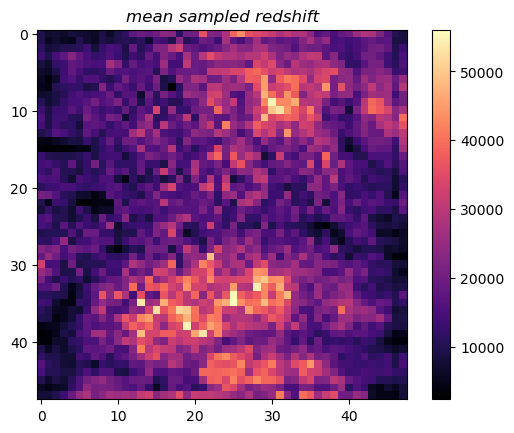

In [4]:
n=48
cmap='magma'
fun = 'len'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean sampled redshift'
square = df[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_len = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_len, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

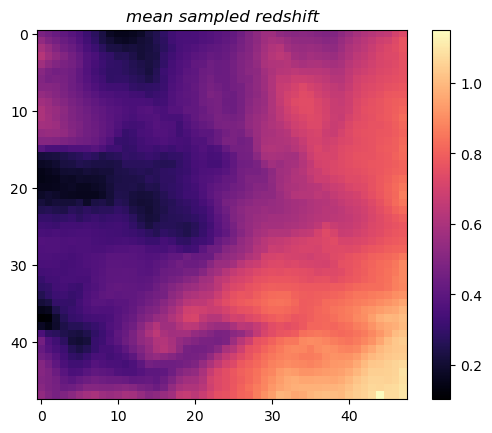

In [5]:
n=48
cmap='magma'
fun = 'mean'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean sampled redshift'
square = df[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_z = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_z, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

In [6]:
ids = np.argsort(im_z.flatten())

In [7]:
percentages = im_len.flatten()[ids].cumsum()/len(df)

In [8]:
masks = []
for lim1, lim2 in zip([0, .25, .5, .75], [.25, .5, .75, 1.]):
    masks.append(ids[(lim1<percentages) & (percentages<=lim2)])

In [9]:
[len(mask) for mask in masks]

[746, 520, 483, 555]

In [10]:
ids

array([1776, 1777,  912, ..., 2255, 2303, 2300])

In [15]:
sum_=0
for mask in masks:
    iv_ =im_len.flatten()[mask].sum()
    print(iv_)
    sum_+=iv_
print(sum_)

11367796
11383521
11383372
11379938
45514627


In [16]:
len(df)

45514627

In [12]:
ids.size

2304

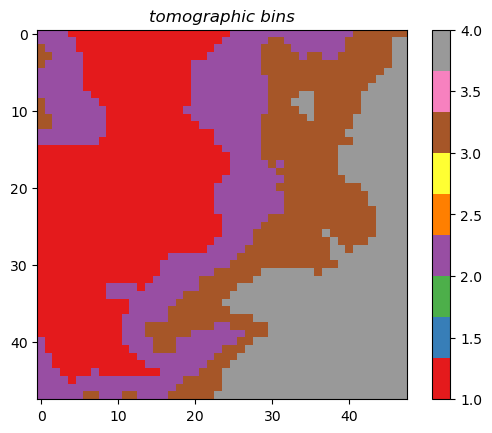

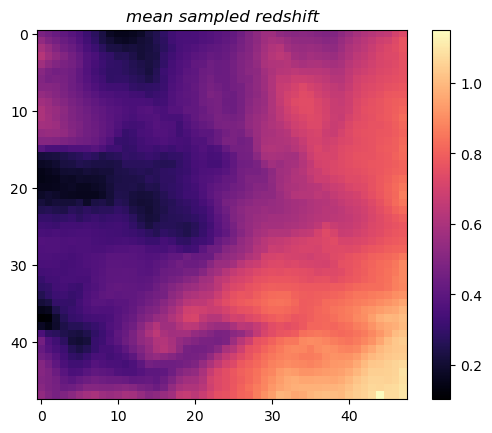

In [12]:
n=48
cmap='Set1'
fun = 'mean'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'tomographic bins'
#square = df[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im = np.zeros(n**2)

for i, mask in enumerate(masks):
    im[mask] = (i+1)
    
im = im.reshape(n,n)

image = plt.imshow(im, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

n=48
cmap='magma'
fun = 'mean'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean sampled redshift'
square = df[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_z = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_z, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

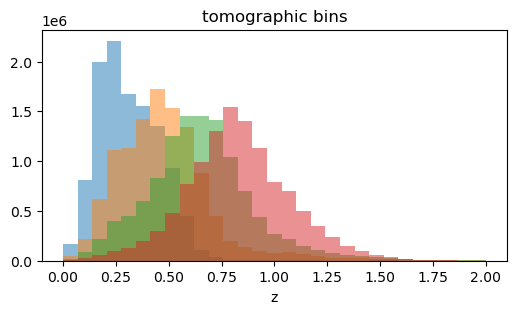

In [19]:
plt.figure(figsize=(6,3))
plt.title('tomographic bins')
plt.xlabel('z')
for zsamp in zsamps:
#     zsamp = df['Z_SAMP'][np.isin(df['cells'], mask)]
#     zsamps.append(zsamp)
    plt.hist(zsamp, alpha=.5, bins=np.linspace(0,2,30))
plt.show()

In [72]:
fnames1.remove('/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_ALL_v2.h5')

In [85]:
for i in range(1,50):
    print(f'{i:02}')
    bdf_df = pd.read_hdf(f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_0000{i:02}.h5') 
    print(len(bdf_df))

01
2490000
02
2490000
03
2490000
04
2490000
05
2490000
06
2490000
07
2490000
08
2490000
09
2490000
10
2490000
11
2490000
12
2490000
13
2490000
14
2490000
15
2490000
16
2490000
17
2490000
18
2490000
19
2490000
20
2490000
21
2490000
22
2490000
23
2490000
24
2490000
25
2490000
26
2490000
27
2490000
28
2490000
29
2490000
30
2490000
31
2490000
32
2490000
33
2490000
34
2490000
35
2490000
36
2490000
37
2490000
38
2490000
39
2490000
40
2490000
41
2490000
42
2490000
43
2490000
44
2490000
45
2490000
46
2490000
47
2490000
48
2490000
49
522630


In [83]:
for i in range(1,50):
    fname1 = f'/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_{i:02}_v2.h5'
    print(fname1)
    fname2 = f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_{i:02}.h5'
    print(fname2)
    f2 = h5py.File(fname2)
    print('a')
    len2 = np.array(f2['df/block1_values']).shape[0]
    print('b')
    f1 = h5py.File(fname1)
    print('c')
    len1 = len(f1['ID'])
    print('d')
    if len2!=len1:
        print(i, len2, len1)

/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_01_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_01.h5
a
b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_02_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_02.h5
a
b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_03_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_03.h5
a
b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_04_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_04.h5
a
b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_05_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_05.h5
a
b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/

b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_45_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_45.h5
a
b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_46_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_46.h5
a
b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_47_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_47.h5
a
b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_48_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_48.h5
a
b
c
d
/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_49_v2.h5
/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_49.h5
a
b
c
d


In [58]:
fnames2.remove('/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_01_2e5.h5')

In [60]:
len(fnames2)

49

In [53]:
fnames1 = glob.glob(f'/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_*v2.h5')
fnames2 = glob.glob(f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_metacal_cut_BPZ_input_*.h5')

# dfs = []

# for fname in fnames:
    
#     df = pd.DataFrame()
#     file = h5py.File(fname)

#     data={}

#     for key in file.keys():
#         if key=='ID':
#             data['COADD_OBJECT_ID']=np.array(file[key])
#         else: data[key]=np.array(file[key])
            
#     for key in data:
#         df[key]=data[key]
        
#     dfs.append(df)

# bpzres = pd.concat(dfs)

# bpzres

#bpzres.to_hdf('/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_ALL_v2.h5', key='df')

In [21]:
lst = np.array([fname.split('_')[-2] for fname in fnames])

In [27]:
np.sort(lst[lst!='ALL'].astype(int))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
bpzres = pd.read_hdf('/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_BDF_HDFN_CWWSB4_ALL.h5', key='df')

np.load('/project2/chihway/raulteixeira/data/som_delve_48_48_MaskV3.npy')

cells = np.load('/project2/chihway/raulteixeira/data/som_delve_48x48_1e6.npz')['cells']

df = pd.read_csv('/project2/chihway/raulteixeira/data/metacal_fluxes+ids_V3_1e6_seed42.csv.gz')
df['cells']=cells

In [ ]:
bdf_df = pd.read_hdf(f'/project2/chihway/raulteixeira/data/bdf_photometry/dr3_1_1_bdf_000049.h5')

In [ ]:
bdf_df.columns

In [ ]:
#df = pd.read_csv('/project2/chihway/raulteixeira/data/metacal_fluxes+ids_V3_1e6_seed42.csv.gz')

In [15]:
bpzres_SOM = pd.read_hdf('/project2/chihway/raulteixeira/data/BPZ_bdf/hdfn_gen/CWWSB4/BPZ_SOM_BDF_HDFN_CWWSB4_ALL_v2.h5')

In [3]:
#df = df.merge(bpzres_SOM, on='COADD_OBJECT_ID')

In [3]:
def flux2mag(flux):
    return -2.5 * np.log10(flux) + 30

bands = ['R', 'I', 'Z']
for band in bands:
    bpzres_SOM[f'MAG_{band}']=flux2mag(bpzres_SOM[f'FLUX_{band}'])

In [4]:
bpzres_SOM['R-I']=bpzres_SOM['MAG_R']-bpzres_SOM['MAG_I']
bpzres_SOM['I-Z']=bpzres_SOM['MAG_I']-bpzres_SOM['MAG_Z']

In [6]:
bpzres_SOM.columns

Index(['CHI_SQ', 'COADD_OBJECT_ID', 'M_0', 'ODDS', 'T_B', 'T_ML', 'Z_B',
       'Z_B_MAX', 'Z_B_MIN', 'Z_MEAN', 'Z_ML', 'Z_SAMP', 'Z_SIG', 'FLUX_R',
       'FLUX_ERR_R', 'FLUX_I', 'FLUX_ERR_I', 'FLUX_Z', 'FLUX_ERR_Z', 'cells',
       'MAG_R', 'MAG_I', 'MAG_Z', 'R-I', 'I-Z'],
      dtype='object')

In [7]:
bpzres_SOM

,CHI_SQ,COADD_OBJECT_ID,M_0,ODDS,T_B,T_ML,Z_B,Z_B_MAX,Z_B_MIN,Z_MEAN,...,FLUX_I,FLUX_ERR_I,FLUX_Z,FLUX_ERR_Z,cells,MAG_R,MAG_I,MAG_Z,R-I,I-Z
0,0.007247,6895874367,21.853415,0.333939,3.0,3.0,0.745,0.905000,0.485000,0.703125,...,1525.321303,90.520345,2091.500412,155.964694,174,23.064169,22.041597,21.698855,1.022572,0.342742
1,0.855203,6895874893,20.959764,0.913849,1.0,1.0,0.585,0.663810,0.506190,0.589598,...,3703.328648,80.300470,6543.900184,148.246770,774,21.913751,21.078519,20.460408,0.835232,0.618111
2,2.117518,6895876258,20.388369,0.807120,3.0,3.0,0.865,0.957732,0.755000,0.844111,...,6745.932101,90.092675,9845.241822,157.697641,741,21.204861,20.427395,20.016934,0.777466,0.410461
3,0.174343,6895876787,21.083139,0.636643,1.0,1.0,0.605,0.785000,0.525195,0.664738,...,3453.482525,100.837569,5306.889739,179.975095,306,22.382944,21.154357,20.687900,1.228587,0.466457
4,0.435208,6895876891,20.836281,0.492466,1.0,2.0,0.365,0.515000,0.295000,0.406942,...,4603.189553,95.983518,6078.172948,163.362173,1323,21.319541,20.842353,20.540567,0.477188,0.301785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52427530,0.035774,7255613070,22.546251,0.663070,1.0,1.0,0.735,0.825000,0.635000,0.736283,...,865.628008,26.884043,1797.992509,122.808303,577,23.665537,22.656672,21.863030,1.008865,0.793641
52427531,0.244961,7255613460,22.826578,0.340543,6.0,6.0,0.565,0.665000,0.245000,0.494726,...,539.859466,37.645740,644.102740,81.093840,1044,23.561528,23.169298,22.977612,0.392230,0.191686
52427532,1.053527,7255613541,21.242275,0.304613,2.0,1.0,0.255,0.565000,0.192598,0.396591,...,2768.886609,36.972659,3532.828792,88.912485,1134,21.865543,21.394237,21.129694,0.471305,0.264544
52427533,0.008299,7255613671,23.309515,0.360243,6.0,6.0,0.265,1.015000,0.165000,0.502538,...,494.694339,31.807462,587.514837,89.904792,1193,23.353259,23.264158,23.077453,0.089101,0.186705


In [8]:
len(bpzres_SOM)

52427535

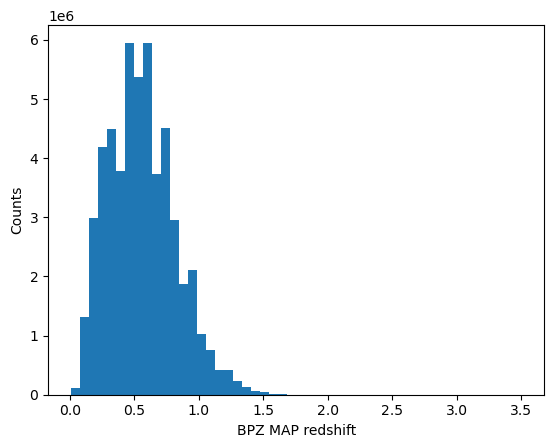

In [9]:
plt.hist(bpzres_SOM.Z_B.values, bins=50)
plt.xlabel('BPZ MAP redshift')
plt.ylabel('Counts')
plt.show()

In [10]:
tomo_bin_edges = [0.2, 0.43, 0.63, 0.9, 1.3]
tomo_masks = [(tomo_bin_edges[i]<bpzres_SOM.Z_MEAN.values)&(bpzres_SOM.Z_MEAN.values<tomo_bin_edges[i+1])\
              for i in range(4)]

In [11]:
tomo_masks

[array([False, False, False, ...,  True, False, False]),
 array([False,  True, False, ..., False,  True,  True]),
 array([ True, False,  True, ..., False, False, False]),
 array([False, False, False, ..., False, False, False])]

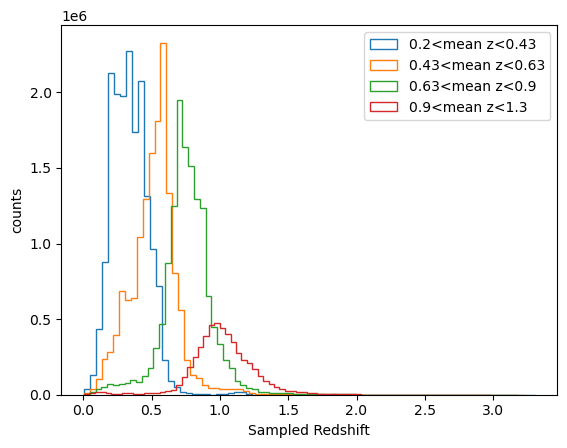

In [12]:
plt.figure()
for i, mask in enumerate(tomo_masks):
    plt.hist(bpzres_SOM.Z_SAMP.values[mask], bins=75, histtype='step',\
             label=f'{tomo_bin_edges[i]:.02}<mean z<{tomo_bin_edges[i+1]:.02}')
    
plt.ylabel('counts')
plt.xlabel('Sampled Redshift')
plt.legend()
plt.show()

Text(0.5, 1.0, 'mean redshift (out of BPZ MAP redshifts)')

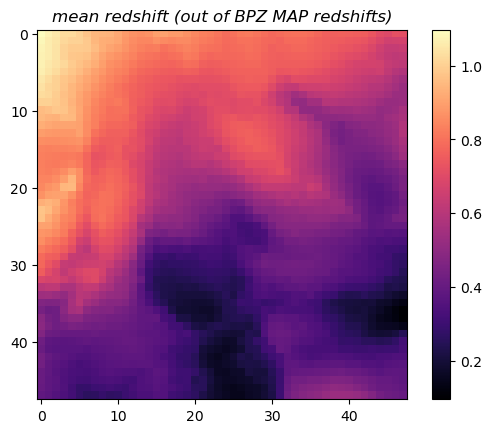

In [13]:
n=48
cmap='magma'
fun = 'mean'
feat = 'Z_B'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean redshift (out of BPZ MAP redshifts)'
square = bpzres_SOM[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')

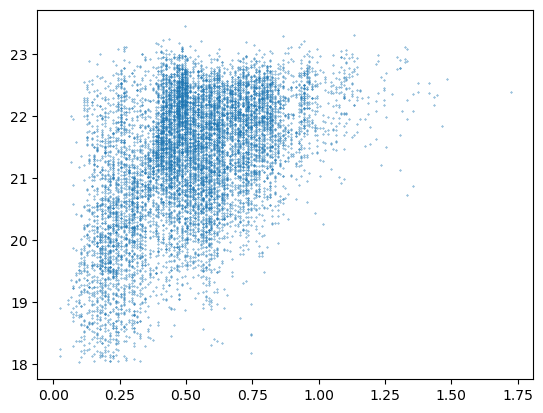

In [16]:
plt.scatter(bpzres_SOM.Z_B.values[:10000], bpzres_SOM.MAG_I.values[:10000], s=.1)

In [30]:
cell_list = np.unique(bpzres_SOM.cells)

In [37]:
cell_mask = (im>.6).flatten()

high_z_cells = cell_list[cell_mask]

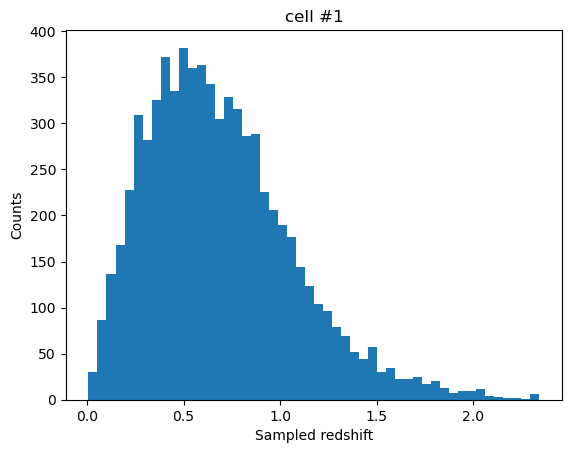

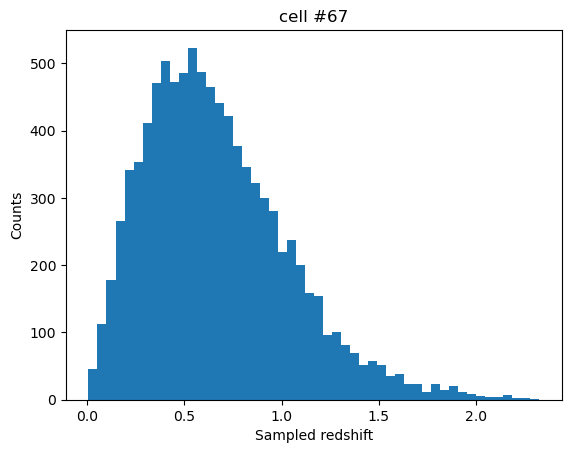

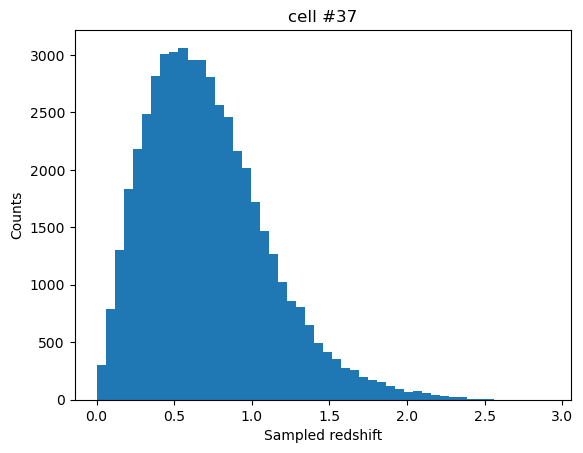

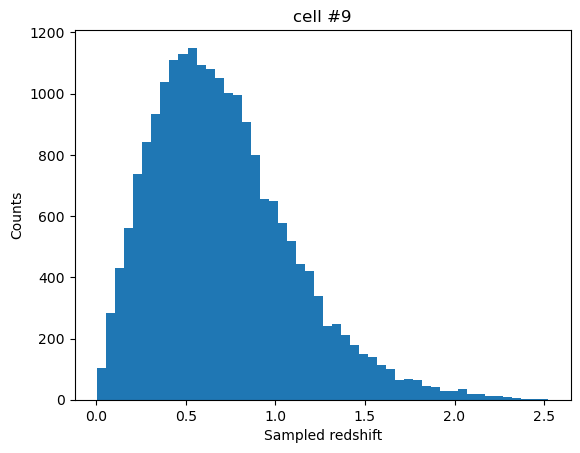

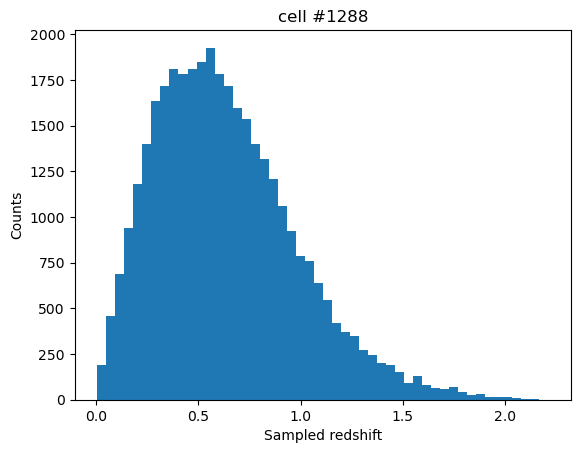

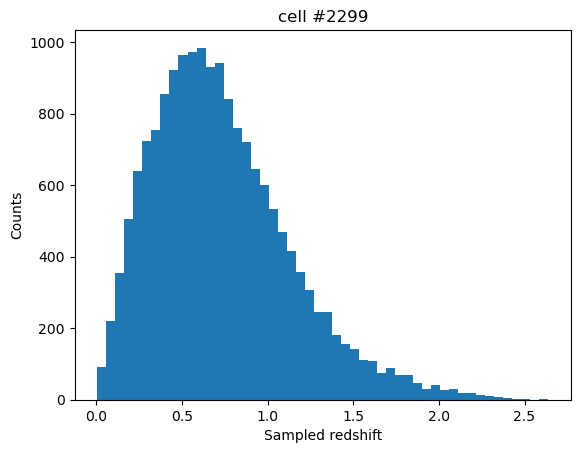

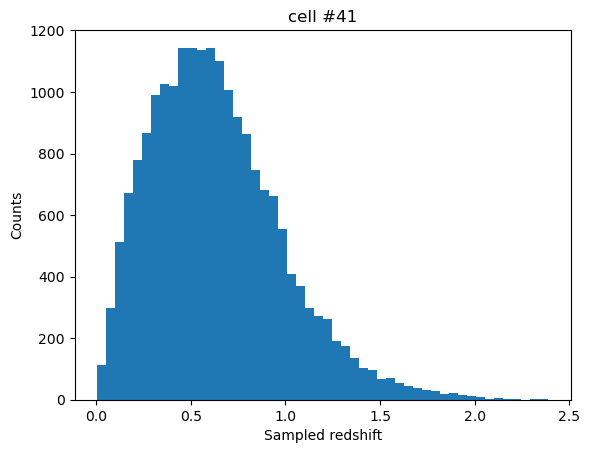

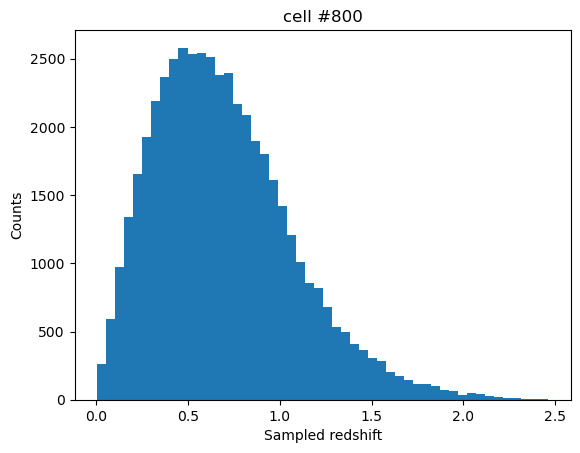

In [46]:
for cell in high_z_cells[[1, 60, 34, 9, 503, 713, 38, 285]]:
    plt.hist(bpzres_SOM.loc[bpzres_SOM['cells']==cell, 'Z_SAMP'], bins=50)
    plt.title(f'cell #{cell}')
    plt.xlabel('Sampled redshift')
    plt.ylabel('Counts')
    plt.show()